# Imports


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # can be used to make histogram of the image
import cv2

# Reading Image and Some Analysis

## Reading the Image


I will be reading the image using matplotlib for convenience of display

In [68]:
img_plt = plt.imread(r'images\\old_guy_v3.jpg')

In [69]:
img_cv2 = cv2.imread(r'images\\old_guy_v3.jpg') # old_guy_v3.jpg

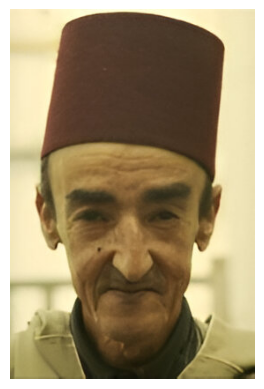

In [70]:
plt.imshow(img_plt)
plt.axis('off')
plt.show()

## Analyzing the Image



RGB Channels of Image

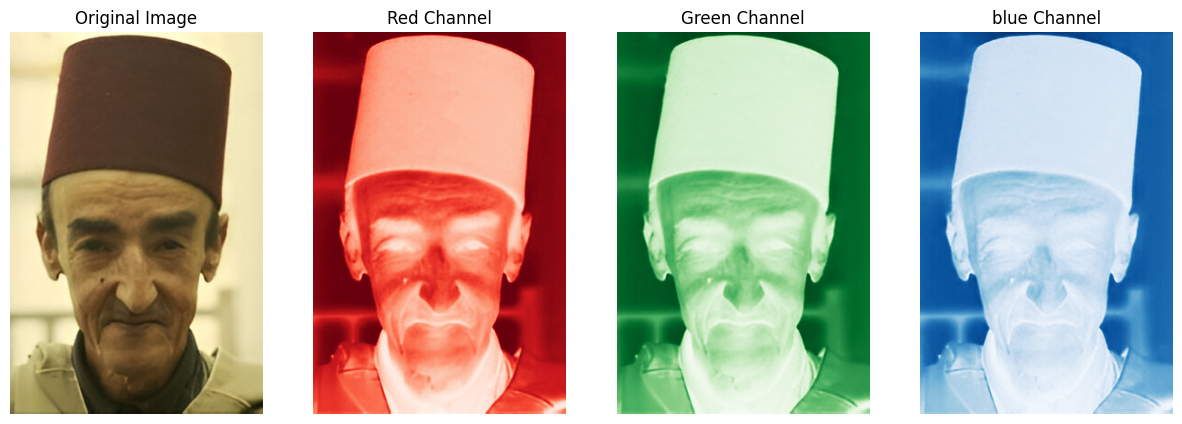

In [71]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_plt)
ax[0].set_title('Original Image')
ax[1].imshow(img_plt[:, :, 0], cmap='Reds') # cmap for visualization
ax[1].set_title('Red Channel')
ax[2].imshow(img_plt[:, :, 1], cmap='Greens')
ax[2].set_title('Green Channel')
ax[3].imshow(img_plt[:, :, 2], cmap='Blues')
ax[3].set_title('blue Channel')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.show()


Histogram of pixel values

Because CV2 reads in the image with the actual pixel intensities, it is better to use it to see the distribution of pixel values beofre normalization t=done by matplotlib.

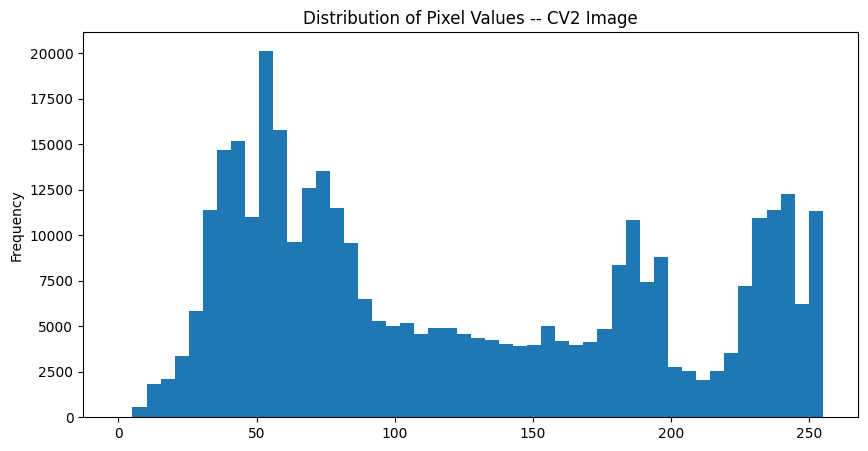

In [72]:
pd.Series(img_cv2.flatten()).plot(kind='hist', bins=50, figsize=(10, 5), title='Distribution of Pixel Values -- CV2 Image')
# flatten() method returns a copy of the array collapsed into one dimension
# pd.Series() method converts the array into a pandas series
plt.show()


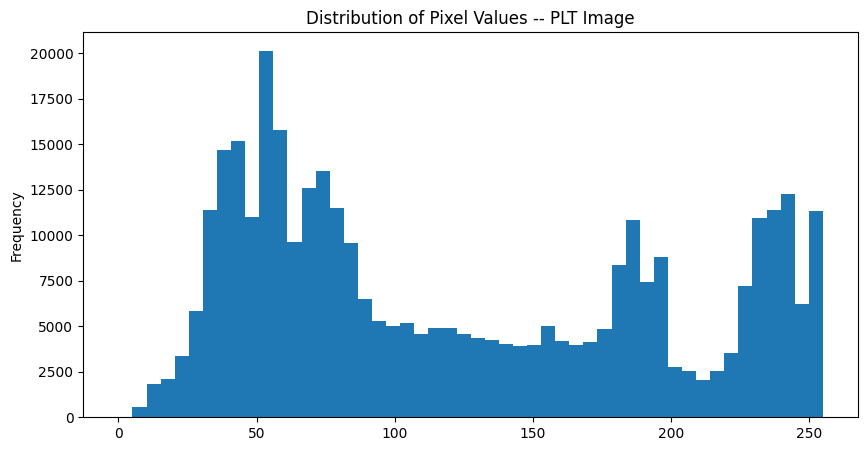

In [73]:
pd.Series(img_plt.flatten()).plot(kind='hist', bins=50, figsize=(10, 5), title='Distribution of Pixel Values -- PLT Image')
plt.show()


In [74]:
def print_image_info(image):
    print(f"Image Type: {type(image)}")
    print(f"Shape: {image.shape}")
    print(f"Size: {image.size}")
    print(f"Data Type: {image.dtype}")
    print(f"Min Value: {image.min()}")
    print(f"Max Value: {image.max()}")
    print(f"Mean Value: {image.mean()}")
    print(f"Standard Deviation: {image.std()}")

In [75]:
print_image_info(img_cv2)

Image Type: <class 'numpy.ndarray'>
Shape: (420, 278, 3)
Size: 350280
Data Type: uint8
Min Value: 0
Max Value: 255
Mean Value: 123.47121445700583
Standard Deviation: 74.43387832983558


In [76]:
print_image_info(img_plt)
# 4th channel is Alpha channel -- for opacity

Image Type: <class 'numpy.ndarray'>
Shape: (420, 278, 3)
Size: 350280
Data Type: uint8
Min Value: 0
Max Value: 255
Mean Value: 123.47121445700583
Standard Deviation: 74.43387832983558


# Filters

## Grayscale

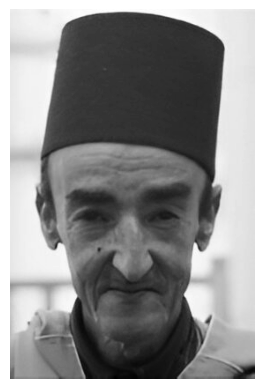

In [77]:
# Convert to grayscale
gray_img = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)

# Display the image using Matplotlib
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [78]:
print_image_info(gray_img)

Image Type: <class 'numpy.ndarray'>
Shape: (420, 278)
Size: 116760
Data Type: uint8
Min Value: 13
Max Value: 252
Mean Value: 131.12436622130866
Standard Deviation: 72.50622464909378


In [79]:
median_kernel = 5 #5
laplacian_kernel = 5 #5
threshold = 150 #150

## Noise Reduction using Median Filter

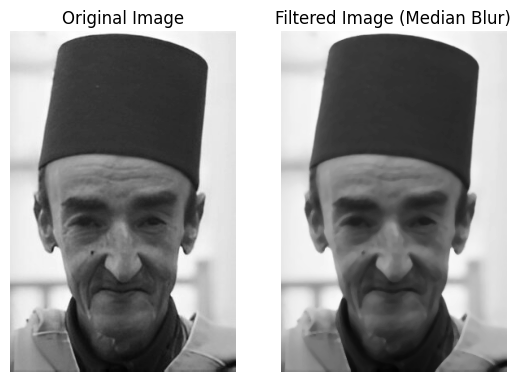

In [80]:
# median
median_img = cv2.medianBlur(gray_img, median_kernel) 

# Display the images
# original gray image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
#image after median blur
plt.subplot(1, 2, 2)
plt.imshow(median_img, cmap='gray')
plt.title("Filtered Image (Median Blur)")
plt.axis('off')

plt.show()

In [81]:
print_image_info(median_img)

Image Type: <class 'numpy.ndarray'>
Shape: (420, 278)
Size: 116760
Data Type: uint8
Min Value: 15
Max Value: 251
Mean Value: 131.14624015073656
Standard Deviation: 72.30990482626456


## Edge Detector using Laplacian Filter

(np.float64(-0.5), np.float64(277.5), np.float64(419.5), np.float64(-0.5))

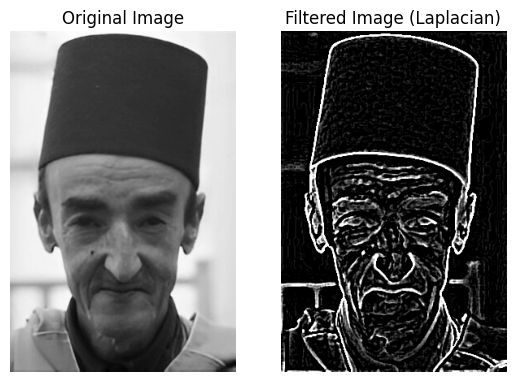

In [82]:
# laplacian
# cv2.Laplacian(src, ddepth, ksize=1, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

laplacian_img = cv2.Laplacian(median_img , -1, ksize=laplacian_kernel)  # data type is same if -1

# laplacian_img = np.uint8(np.absolute(laplacian_img)) # convert to unsigned int to display it correctly
# since cv2.imshow() expects uint8 images

# plt.figure(figsize=(10, 5))
# original gray image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
#image after laplacian filter
plt.subplot(1, 2, 2)
plt.imshow(laplacian_img, cmap='gray')
plt.title("Filtered Image (Laplacian)")
plt.axis('off')



## Binary Thresholding

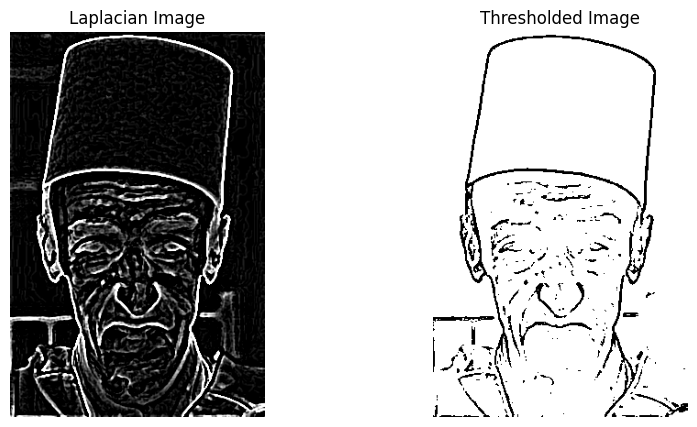

In [83]:
#_, thresh_img = cv2.threshold(src, thresh, maxval, type)
_, thresh_img = cv2.threshold(laplacian_img, threshold, 255, cv2.THRESH_BINARY) # cv2.THRESH_BINARY_INV
thresh_img = cv2.bitwise_not(thresh_img) # invert the image

plt.figure(figsize=(10, 5))
# laplacian image
plt.subplot(1, 2, 1)
plt.imshow(laplacian_img, cmap='gray')
plt.title("Laplacian Image")
plt.axis('off')
#image after thresholding
plt.subplot(1, 2, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()


In [84]:
print_image_info(thresh_img)

Image Type: <class 'numpy.ndarray'>
Shape: (420, 278)
Size: 116760
Data Type: uint8
Min Value: 0
Max Value: 255
Mean Value: 236.1043165467626
Standard Deviation: 66.79335616220067


## Bilateral Filter

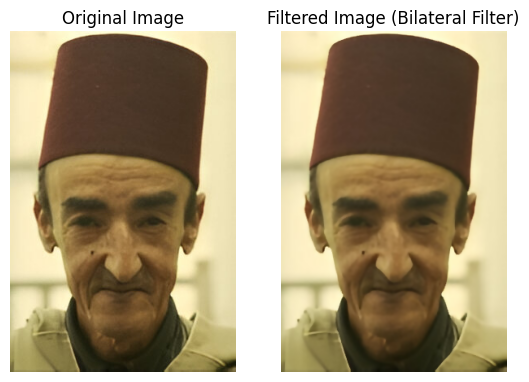

In [85]:
# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, borderType=cv2.BORDER_DEFAULT)

# Apply bilateral filter (d=9, sigmaColor=75, sigmaSpace=75)
bilateral_img = cv2.bilateralFilter(img_cv2, 5, 50, 50)

# Display the images
# original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
#image after bilateral filter
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bilateral_img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image (Bilateral Filter)")
plt.axis('off')
plt.show()



In [86]:
print_image_info(bilateral_img)

Image Type: <class 'numpy.ndarray'>
Shape: (420, 278, 3)
Size: 350280
Data Type: uint8
Min Value: 5
Max Value: 255
Mean Value: 123.47799760191846
Standard Deviation: 74.34607111736982


## Overlay

In [87]:
mask = thresh_img

# keeps only nonzero elements from the image
# mask is to apply and there in white areas( the edges) and black areas are not applied -- zeroed out
edges_colored = cv2.bitwise_and(bilateral_img, bilateral_img, mask=mask)



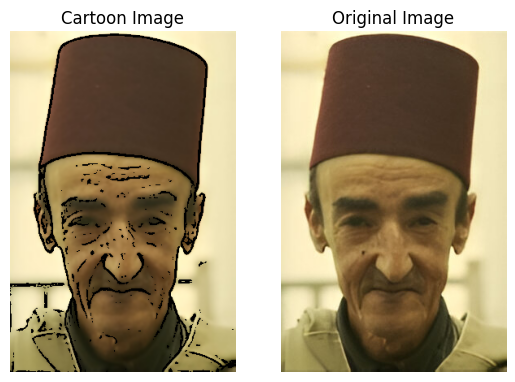

In [88]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(edges_colored, cv2.COLOR_BGR2RGB))
plt.title("Cartoon Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()